In [1]:
from adaptiveBinsGradient import tangentni_vektor

f = lambda x: x**2
df = lambda x: 2*x

arr1 = tangentni_vektor(f,df,0)
arr2 = tangentni_vektor(f,df,1)
arr3 = tangentni_vektor(f,df,2)

In [2]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(0,3,1000)

plt.plot(x,f(x))
plt.arrow(0,0,*arr1)
plt.arrow(1,1,*arr2)
plt.arrow(2,4,*arr3)
plt.show()

<Figure size 640x480 with 1 Axes>

OPOMBA: vektorji so dolžine 1, ampak ne izgleda tako zaradi skale na y osi.

# Stolpci

poglejmo sedaj za adaptivno sirino stolpcev.

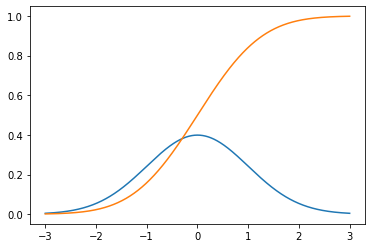

In [3]:
from scipy.stats import norm
from adaptiveBinsGradient import naslednji_korak, dolzina_krivulje_f

x = np.linspace(-3,3,1000)

pdf = norm.pdf
cdf = norm.cdf

plt.plot(x,pdf(x))
plt.plot(x,cdf(x))

Problem je, da je zaloga vrednosti CDF na intervalu [0,1], zato zelo položna, kar pomeni, da bodo projekcije tangentnih vektorjev na x os zelo blizu ena. Moramo pomnožiti CDF z nekim faktorjem, da dobimo bolj strmo CDF, sploh v mu

In [4]:
# dol = dolzina_krivulje_f(pdf,-3,3)
N = 20
# koef = dol/50

cdf1 = lambda x: N*cdf(x)
pdf1 = lambda x: N*pdf(x)

xs = [-3]

x = -3
while x<=3:
    dx = naslednji_korak(cdf1,pdf1,x)
#     print(dx)
    x += dx
    xs.append(x)

In [5]:
len(xs)

23

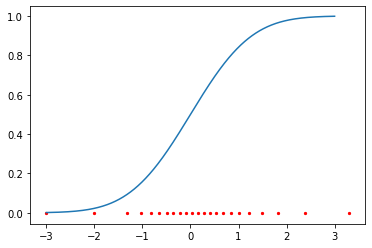

In [6]:
x = np.linspace(-3,3,1000)
plt.plot(x,cdf(x))
plt.scatter(xs,[0 for _ in xs], s=5, color='red')
plt.show()

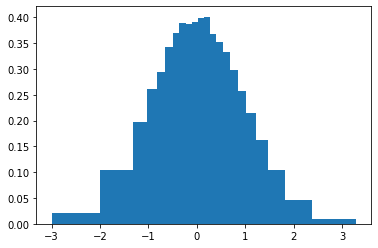

In [7]:
import random as r

gauss = []

for i in range(100000):
    gauss.append(r.gauss(0,1))
    
plt.hist(gauss,bins=xs,density=1)
plt.show()

To zgleda vredu. Poglejmo za več N:

In [8]:
XN = []

for N in range(5,100):

    cdf1 = lambda x: N*cdf(x)
    pdf1 = lambda x: N*pdf(x)

    xs = [-3]

    x = -3
    while x<=3:
        dx = naslednji_korak(cdf1,pdf1,x)
    #     print(dx)
        x += dx
        xs.append(x)

    XN.append(len(xs))

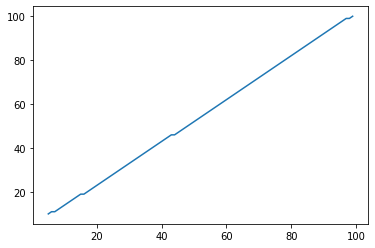

In [9]:
plt.plot(range(5,100),XN)
plt.show()

Kaj se je zgodilo? Če CDF pomnožimo z N, bomo dobili ravno N točk za stolpce.

Ideja za izboljšavo: štartaš v mode-u oziroma več njih, greš v vsaki iteraciji na vsako stran.

# Druge normalne porazdelitve

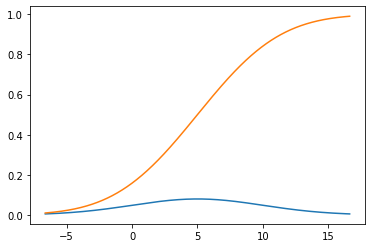

In [10]:
from scipy.stats import norm
from adaptiveBinsGradient import naslednji_korak, dolzina_krivulje_f

loc=5
scale=5


x = np.linspace(norm.ppf(0.01,loc,scale),norm.ppf(0.99,loc,scale),1000)

pdf = lambda x: norm.pdf(x,loc, scale)
cdf = lambda x: norm.cdf(x,loc, scale)

plt.plot(x,pdf(x))
plt.plot(x,cdf(x))

In [11]:
XN = []

for N in range(1,100):

    cdf1 = lambda x: N*cdf(x)
    pdf1 = lambda x: N*pdf(x)

    x = norm.ppf(0.01,loc,scale)
    xs = [x]
    while x<=norm.ppf(0.99,loc,scale):
        dx = naslednji_korak(cdf1,pdf1,x)
    #     print(dx)
        x += dx
        xs.append(x)
    
    XN.append(len(xs))

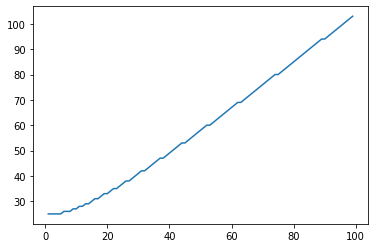

In [12]:
plt.plot(range(1,100),XN)
plt.show()

Zgornji graf ni čisto linearen.

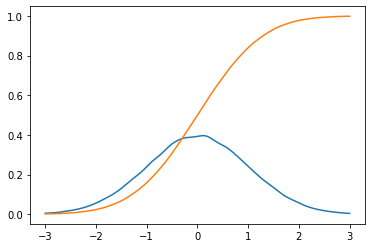

In [13]:
from scipy.stats import gaussian_kde
from statsmodels.distributions.empirical_distribution import ECDF

pdf = gaussian_kde(gauss)
cdf = ECDF(gauss)

x = np.linspace(-3,3,1000)
plt.plot(x,pdf(x))
plt.plot(x,cdf(x))
plt.show()

29


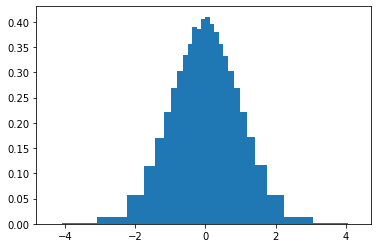

In [70]:
from adaptiveBinsGradient import data_to_adaptive_bins

gauss = []

for _ in range(100000):
    gauss.append(r.gauss(0,1))

xs = data_to_adaptive_bins(gauss, N = 20)
print(len(xs))

plt.hist(gauss,bins=xs, density=1)

plt.show()

?? tale zgoraj je neki čudna (mean=5, var=10)

13


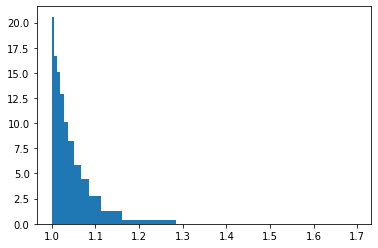

In [45]:
pareto = []

for _ in range(10000):
    pareto.append(r.paretovariate(20))
    
xs = data_to_adaptive_bins(pareto, N=10)
print(len(xs))

plt.hist(pareto, bins=xs, density=1)

plt.show()

20


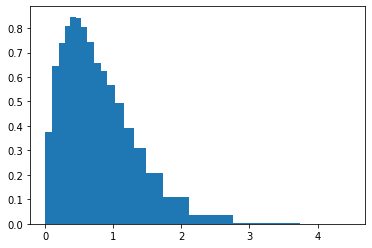

In [46]:
weibull = []

for _ in range(10000):
    weibull.append(r.weibullvariate(0.9,1.5))
    
xs = data_to_adaptive_bins(weibull, N=15)
print(len(xs))

plt.hist(weibull, bins=xs, density=1)

plt.show()

# Primerjava s KL-staticno

primerjamo kl-adaptivno in kl-staticno metodo.

iskanje od 10 do 100:
10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,

-0.0011680574373546637 -0.0011124356546234893
Indeksi pod mejo napake:

[]



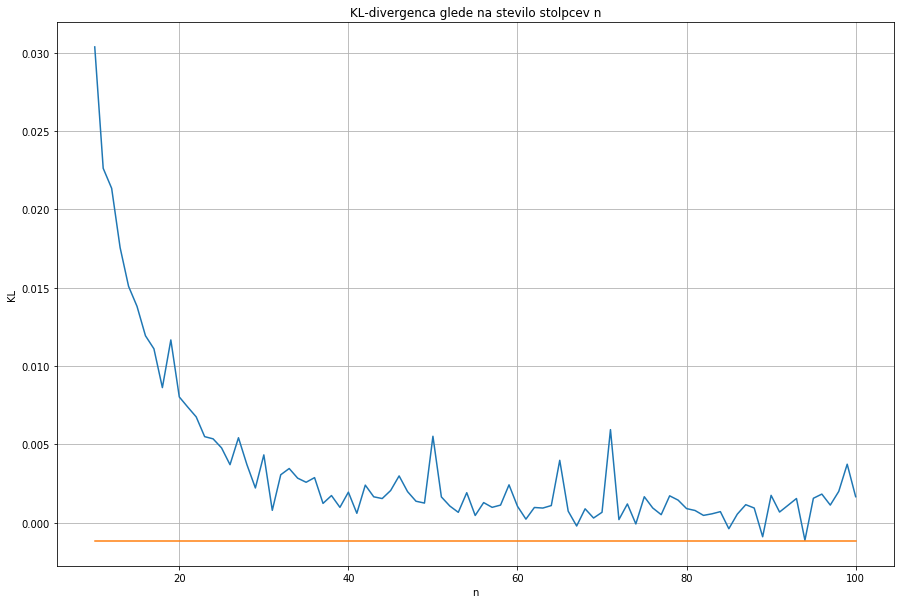

iskanje od 5 do 100:
5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,

0.00015592117934482008 0.00014849636128078103
Indeksi pod mejo napake:

[76]



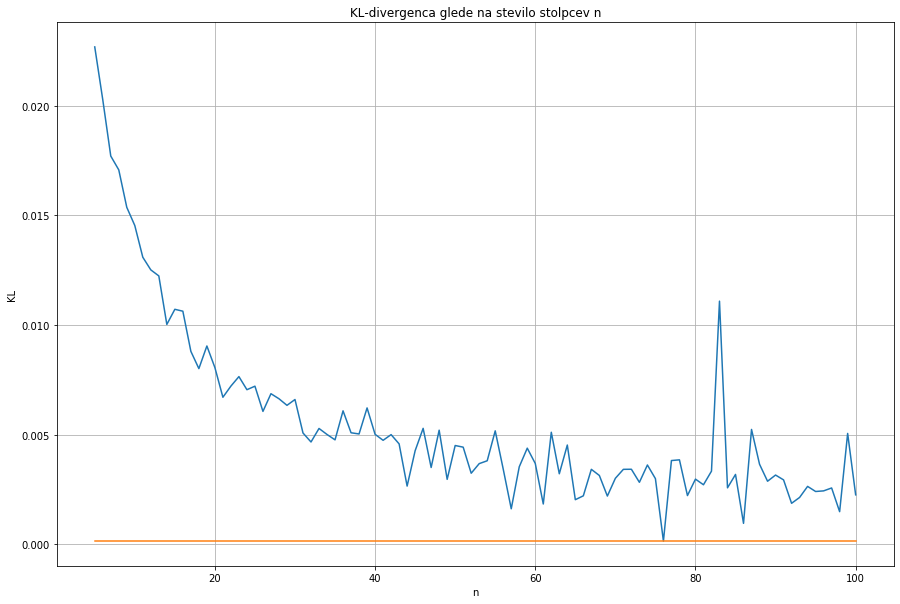

In [71]:
from adaptivniKL import KL_adaptivni
from optimalBinNumber import optBinNum

bins1 = optBinNum(gauss,"kl",izris=1)
plt.show()
bins2 = KL_adaptivni(gauss, izris=1)
plt.show()


In [72]:

len(bins2)

85

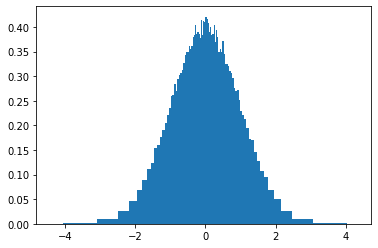

In [73]:
plt.hist(gauss,bins=bins2,density=1)
plt.show()

In [74]:
y1,x1 = np.histogram(gauss, bins=bins1, density=1)
y2,x2 = np.histogram(gauss, bins=bins2, density=1)

from renyi import renyi_entropy_cont, renyi_hist_entropy
from GMM import norm

normal01 = lambda x: norm(x,0,1)

alpha = 1

entropija_tocna = renyi_entropy_cont(normal01, alpha, -5,5)
entropija_bins1 = renyi_hist_entropy(x1,y1, alpha)
entropija_bins2 = renyi_hist_entropy(x2,y2, alpha)


In [75]:
entropija_tocna, entropija_bins1, entropija_bins2

(1.4189302861251771, 1.4190718883366642, 1.4213949278551)

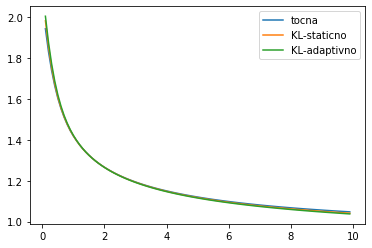

In [76]:
entropija_tocna = []
entropija_bins1 = []
entropija_bins2 = []

rang = np.arange(0.1,10,0.1)

for i in rang:
    entropija_tocna.append(renyi_entropy_cont(normal01, i, minimum=-4, maximum=4))
    entropija_bins1.append(renyi_hist_entropy(x1,y1, i))
    entropija_bins2.append(renyi_hist_entropy(x2,y2, i))
    
plt.plot(rang,entropija_tocna,label="tocna")
plt.plot(rang,entropija_bins1,label="KL-staticno")
plt.plot(rang,entropija_bins2,label="KL-adaptivno")

plt.legend()

plt.show()

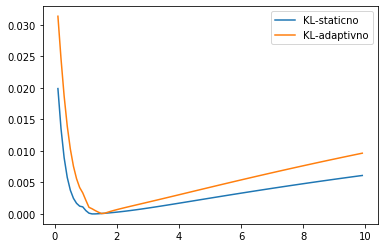

In [77]:
entropija_bins1_relativna = [abs(entropija_tocna[i]-entropija_bins1[i])/entropija_tocna[i] for i in range(len(rang))]
entropija_bins2_relativna = [abs(entropija_tocna[i]-entropija_bins2[i])/entropija_tocna[i] for i in range(len(rang))]

plt.plot(rang,entropija_bins1_relativna,label="KL-staticno")
plt.plot(rang,entropija_bins2_relativna,label="KL-adaptivno")

plt.legend()

plt.show()

In [36]:
bins1

75